<a href="https://colab.research.google.com/github/KudryashovDmitry/PDA_SOL/blob/main/%D0%9F%D1%80_4_%D0%9A%D1%83%D0%B4%D1%80%D1%8F%D1%88%D0%BE%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Выполнил: Кудряшов Дмитрий

В соответствии с номером вариант № 17. Анализ потребительских кредитов.
Были поставлены следующие задачи:
1. Сравнить динамику выдачи потребительских кредитов по регионам.
2. Определить какую роль играет возраст заемщика?

Исходные данные найдены и взяты с источника: https://www.kaggle.com/datasets/zafish/consumer-loans

orig_test.csv

In [ ]:
# Импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Чтение исходника датасета
df = pd.read_csv('/content/drive/MyDrive/Набор данных для Лаб. №4/orig_train.csv')
df.head()


,PRODUCT,AGE,AREA,RESIDENTIAL_PLACE,EDUCATION,MARITAL_STATUS,HOUSEHOLD_MEMBERS,NO_OF_DEPENDENTS,INCOME,WORK_SENIORITY,...,LENGTH_RELATIONSHIP_WITH_CLIENT,DEBIT_CARD,CURRENT_ACCOUNT,SAVING_ACCOUNT,SALARY_ACCOUNT,FOREIGN_ACCOUNT,FINALIZED_LOAN,DEPOSIT,PENSION_FUNDS,DEFAULT_FLAG
0,C,65,County capital,Owner without mortgage,University,married,2,0,1245.0,5,...,1,0,0,0,0,0,0,0,0,0
1,C,64,County capital,Owner without mortgage,University,married,2,0,1380.0,5,...,8,0,0,0,0,0,0,0,0,0
2,F,30,Urban area,Living with family,University,married,2,0,1131.0,2,...,1,1,1,0,0,0,0,0,0,0
3,C,39,County capital,Owner without mortgage,Post-graduate,divorced,1,0,1730.0,9,...,2,0,0,0,0,0,0,0,0,0
4,B,38,County capital,Owner without mortgage,Highschool,single,1,0,1189.0,5,...,1,1,1,0,0,0,0,0,0,0


PRODUCT: Тип продукта
AGE: Возраст заемщика
AREA: Регион (например, "County capital", "Rural area")
RESIDENTIAL_PLACE: Место проживания заемщика (например, "Owner without mortgage")
EDUCATION: Уровень образования заемщика
MARITAL_STATUS: Семейное положение
HOUSEHOLD_MEMBERS: Количество членов домохозяйства
NO_OF_DEPENDENTS: Количество иждивенцев
INCOME: Доход заемщика
WORK_SENIORITY: Стаж работы
BUSINESS AGE: Возраст бизнеса (если применимо)
ECONOMIC_SECTOR: Экономический сектор
EMPLOYEE_NO: Количество сотрудников
LENGTH_RELATIONSHIP_WITH_CLIENT: Длительность отношений с клиентом
DEBIT_CARD: Наличие дебетовой карты (1 - есть, 0 - нет)
CURRENT_ACCOUNT: Наличие текущего счета
SAVING_ACCOUNT: Наличие сберегательного счета
SALARY_ACCOUNT: Наличие зарплатного счета
FOREIGN_ACCOUNT: Наличие иностранного счета
FINALIZED_LOAN: Завершенный кредит (1 - да, 0 - нет)
DEPOSIT: Наличие депозита
PENSION_FUNDS: Наличие пенсионных фондов
DEFAULT_FLAG: Флаг дефолта (1 - дефолт, 0 - нет) означает просрочен не возвращен

In [ ]:
# Замена значений "Missing" на "Other" в колонке "AREA"
df['AREA'] = df['AREA'].replace('Missing', 'Other')

# Создание новой таблицы с переименованными колонками для удобства
df_calc = df.copy()
df_calc.rename(columns={
    'PRODUCT': 'Credit_Type',
    'AGE': 'Age',
    'AREA': 'Region',
    'INCOME': 'Income'
}, inplace=True)


In [ ]:
# Создание столбца с возрастными группами
df_calc['Age_Group'] = pd.cut(df_calc['Age'], bins=[18, 24, 30, 40, 50, 60, 75, 100],
                              labels=["18-24", "25-30", "31-40", "41-50", "51-60", "61-75", "76+"])

#  создания новых столбцов
df_calc['Income/Dependents'] = df_calc['Income'] / (df_calc['NO_OF_DEPENDENTS'] + 1)  # Чтобы избежать деления на 0
df_calc['Income/Household'] = df_calc['Income'] / df_calc['HOUSEHOLD_MEMBERS']

In [ ]:
df_calc.head()

,Credit_Type,Age,Region,RESIDENTIAL_PLACE,EDUCATION,MARITAL_STATUS,HOUSEHOLD_MEMBERS,NO_OF_DEPENDENTS,Income,WORK_SENIORITY,...,SAVING_ACCOUNT,SALARY_ACCOUNT,FOREIGN_ACCOUNT,FINALIZED_LOAN,DEPOSIT,PENSION_FUNDS,DEFAULT_FLAG,Age_Group,Income/Dependents,Income/Household
0,C,65,County capital,Owner without mortgage,University,married,2,0,1245.0,5,...,0,0,0,0,0,0,0,61-75,1245.0,622.5
1,C,64,County capital,Owner without mortgage,University,married,2,0,1380.0,5,...,0,0,0,0,0,0,0,61-75,1380.0,690.0
2,F,30,Urban area,Living with family,University,married,2,0,1131.0,2,...,0,0,0,0,0,0,0,25-30,1131.0,565.5
3,C,39,County capital,Owner without mortgage,Post-graduate,divorced,1,0,1730.0,9,...,0,0,0,0,0,0,0,31-40,1730.0,1730.0
4,B,38,County capital,Owner without mortgage,Highschool,single,1,0,1189.0,5,...,0,0,0,0,0,0,0,31-40,1189.0,1189.0


<ipython-input-69-69fd1fa55393>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_analysis = df_calc.groupby(['Region', 'Age_Group'])['Income'].mean().unstack()


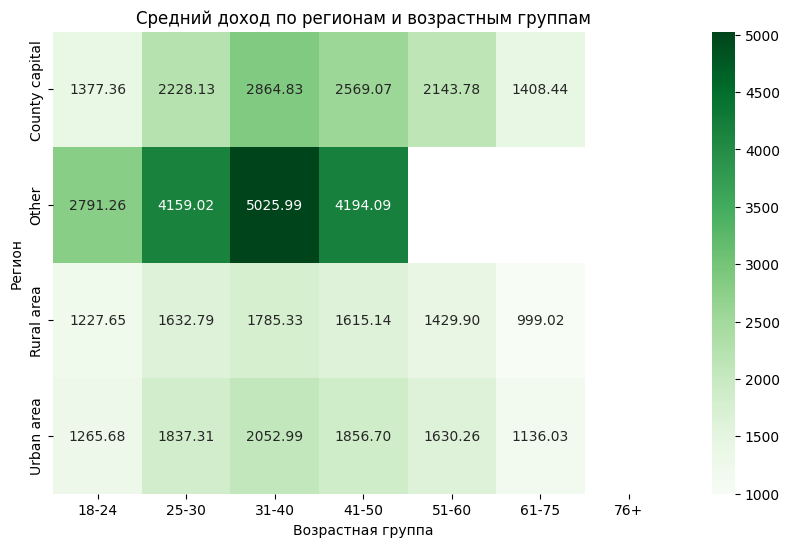

In [ ]:
# Дополнительный пример анализа: Средний доход по возрастным группам и регионам
income_analysis = df_calc.groupby(['Region', 'Age_Group'])['Income'].mean().unstack()

# Визуализация среднего дохода по регионам и возрастным группам
plt.figure(figsize=(10, 6))
sns.heatmap(income_analysis, annot=True, cmap="Greens", fmt=".2f")
plt.title('Средний доход по регионам и возрастным группам')
plt.xlabel('Возрастная группа')
plt.ylabel('Регион')
plt.show()

In [ ]:
print("Проверка на пустые значения:")
print(df_calc.isnull().sum())

print("\nПроверка на дубликаты:")
print(df_calc.duplicated().sum())

Проверка на пустые значения:
Credit_Type                        0
Age                                0
Region                             0
RESIDENTIAL_PLACE                  0
EDUCATION                          0
MARITAL_STATUS                     0
HOUSEHOLD_MEMBERS                  0
NO_OF_DEPENDENTS                   0
Income                             0
WORK_SENIORITY                     0
BUSINESS AGE                       0
ECONOMIC_SECTOR                    0
EMPLOYEE_NO                        0
LENGTH_RELATIONSHIP_WITH_CLIENT    0
DEBIT_CARD                         0
CURRENT_ACCOUNT                    0
SAVING_ACCOUNT                     0
SALARY_ACCOUNT                     0
FOREIGN_ACCOUNT                    0
FINALIZED_LOAN                     0
DEPOSIT                            0
PENSION_FUNDS                      0
DEFAULT_FLAG                       0
Age_Group                          0
Income/Dependents                  0
Income/Household                   0
dtype: in

In [ ]:
df_calc = df_calc.drop_duplicates()


In [ ]:
# Проверка на выбросы для дохода (значения равные 0)
income_zero = df_calc[df_calc['Income'] == 0]
print("Количество записей с доходом равным 0:")
print(len(income_zero))

# Проверка на выбросы для возраста
df_calc['Age_Z'] = stats.zscore(df_calc['Age'])

# Выявление аномалий по возрасту
anomalies_age = df_calc[abs(df_calc['Age_Z']) > 3]
print("\nКоличество аномалий по возрасту (Z-оценка > 3):")
print(len(anomalies_age))
print(anomalies_age[['Age', 'Age_Z']])


Количество записей с доходом равным 0:
41

Количество аномалий по возрасту (Z-оценка > 3):
0
Empty DataFrame
Columns: [Age, Age_Z]
Index: []


In [ ]:
# Создание новой таблицы с нулевым доходом
income_zero_df = df_calc[df_calc['Income'] == 0]
income_zero_df.head()


,Credit_Type,Age,Region,RESIDENTIAL_PLACE,EDUCATION,MARITAL_STATUS,HOUSEHOLD_MEMBERS,NO_OF_DEPENDENTS,Income,WORK_SENIORITY,...,SALARY_ACCOUNT,FOREIGN_ACCOUNT,FINALIZED_LOAN,DEPOSIT,PENSION_FUNDS,DEFAULT_FLAG,Age_Group,Income/Dependents,Income/Household,Age_Z
556,E,32,County capital,Living with family,Primary school,married,2,0,0.0,1,...,1,0,0,0,0,1,31-40,0.0,0.0,-0.860632
806,E,38,Rural area,Living with family,Highschool,married,2,0,0.0,1,...,1,0,0,0,0,0,31-40,0.0,0.0,-0.414884
972,B,33,County capital,Living with family,Post-graduate,married,1,0,0.0,1,...,0,0,0,0,0,0,31-40,0.0,0.0,-0.786341
1281,B,32,County capital,Living with family,Primary school,married,2,0,0.0,1,...,1,0,0,0,0,1,31-40,0.0,0.0,-0.860632
1608,B,28,County capital,Owner without mortgage,Highschool,married,2,0,0.0,16,...,0,0,0,1,0,0,25-30,0.0,0.0,-1.157797


In [ ]:
print(f"Количество записей с нулевым доходом: {len(income_zero_df)}")
print("\nЗаписи с нулевым доходом:")
print(income_zero_df.head())

Количество записей с нулевым доходом: 41

Записи с нулевым доходом:
     Credit_Type  Age          Region       RESIDENTIAL_PLACE       EDUCATION  \
556            E   32  County capital      Living with family  Primary school   
806            E   38      Rural area      Living with family      Highschool   
972            B   33  County capital      Living with family   Post-graduate   
1281           B   32  County capital      Living with family  Primary school   
1608           B   28  County capital  Owner without mortgage      Highschool   

     MARITAL_STATUS  HOUSEHOLD_MEMBERS  NO_OF_DEPENDENTS  Income  \
556         married                  2                 0     0.0   
806         married                  2                 0     0.0   
972         married                  1                 0     0.0   
1281        married                  2                 0     0.0   
1608        married                  2                 0     0.0   

      WORK_SENIORITY  ...  SALARY_AC

1. Записи показывают, что большинство заемщиков проживает с семьей. Это может означать, что заемщики могут получать поддержку от своих близких, что также может быть фактором, позволяющим им получать кредит.
2. Заемщики могли предоставить залог или иметь поручителей, которые готовы взять на себя ответственность за погашение кредита в случае дефолта. Это может снизить риски для кредитора.
3. Есть вероятность, что данные о доходах были неверно указаны или не полностью отражены. Возможно, заемщики забыли указать свои доходы или использовали различные источники дохода, которые не были учтены.

In [ ]:
# Создание таблицы для людей с членами семьи
with_family_df = df_calc[(df_calc['HOUSEHOLD_MEMBERS'] > 1) | (df_calc['NO_OF_DEPENDENTS'] > 0)]
with_family_df.head()

,Credit_Type,Age,Region,RESIDENTIAL_PLACE,EDUCATION,MARITAL_STATUS,HOUSEHOLD_MEMBERS,NO_OF_DEPENDENTS,Income,WORK_SENIORITY,...,SALARY_ACCOUNT,FOREIGN_ACCOUNT,FINALIZED_LOAN,DEPOSIT,PENSION_FUNDS,DEFAULT_FLAG,Age_Group,Income/Dependents,Income/Household,Age_Z
0,C,65,County capital,Owner without mortgage,University,married,2,0,1245.0,5,...,0,0,0,0,0,0,61-75,1245.0,622.500000,1.590982
1,C,64,County capital,Owner without mortgage,University,married,2,0,1380.0,5,...,0,0,0,0,0,0,61-75,1380.0,690.000000,1.516691
2,F,30,Urban area,Living with family,University,married,2,0,1131.0,2,...,0,0,0,0,0,0,25-30,1131.0,565.500000,-1.009215
6,C,45,County capital,Owner without mortgage,Missing,married,3,1,1010.0,7,...,0,0,0,0,0,0,41-50,505.0,336.666667,0.105155
8,C,45,Rural area,Owner without mortgage,Other,married,2,0,816.8,20,...,0,0,0,0,0,0,41-50,816.8,408.400000,0.105155


In [ ]:
# Создание таблицы для одиноких
single_df = df_calc[(df_calc['HOUSEHOLD_MEMBERS'] == 1) & (df_calc['NO_OF_DEPENDENTS'] == 0)]
single_df.head()

,Credit_Type,Age,Region,RESIDENTIAL_PLACE,EDUCATION,MARITAL_STATUS,HOUSEHOLD_MEMBERS,NO_OF_DEPENDENTS,Income,WORK_SENIORITY,...,SAVING_ACCOUNT,SALARY_ACCOUNT,FOREIGN_ACCOUNT,FINALIZED_LOAN,DEPOSIT,PENSION_FUNDS,DEFAULT_FLAG,Age_Group,Income/Dependents,Income/Household
3,C,39,County capital,Owner without mortgage,Post-graduate,divorced,1,0,1730.000,9,...,0,0,0,0,0,0,0,31-40,1730.000,1730.000
4,B,38,County capital,Owner without mortgage,Highschool,single,1,0,1189.000,5,...,0,0,0,0,0,0,0,31-40,1189.000,1189.000
5,C,40,Rural area,Owner without mortgage,Missing,single,1,0,740.000,7,...,0,0,0,0,0,0,0,31-40,740.000,740.000
7,B,27,Rural area,Living with family,Post secondary school,single,1,0,630.000,4,...,0,0,0,0,0,0,1,25-30,630.000,630.000
10,B,28,County capital,Living with family,University,single,1,0,2645.405,3,...,0,0,0,0,0,0,0,25-30,2645.405,2645.405


In [ ]:
# Вывод количества записей в каждой новой таблице
print(f"Количество записей с членами семьи: {len(with_family_df)}")
print(f"Количество одиноких записей: {len(single_df)}")

# Вывод первых нескольких строк для проверки
print("\nПримеры записей с членами семьи:")
print(with_family_df.head())

print("\nПримеры одиноких записей:")
print(single_df.head())


Количество записей с членами семьи: 8608
Количество одиноких записей: 6489

Примеры записей с членами семьи:
  Credit_Type  Age          Region       RESIDENTIAL_PLACE   EDUCATION  \
0           C   65  County capital  Owner without mortgage  University   
1           C   64  County capital  Owner without mortgage  University   
2           F   30      Urban area      Living with family  University   
6           C   45  County capital  Owner without mortgage     Missing   
8           C   45      Rural area  Owner without mortgage       Other   

  MARITAL_STATUS  HOUSEHOLD_MEMBERS  NO_OF_DEPENDENTS  Income  WORK_SENIORITY  \
0        married                  2                 0  1245.0               5   
1        married                  2                 0  1380.0               5   
2        married                  2                 0  1131.0               2   
6        married                  3                 1  1010.0               7   
8        married                  2      

<ipython-input-21-b0d78788e7ad>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  region_credit_analysis_with_family = with_family_df.groupby(['Region', 'Age_Group'])['Credit_Type'].count().unstack()


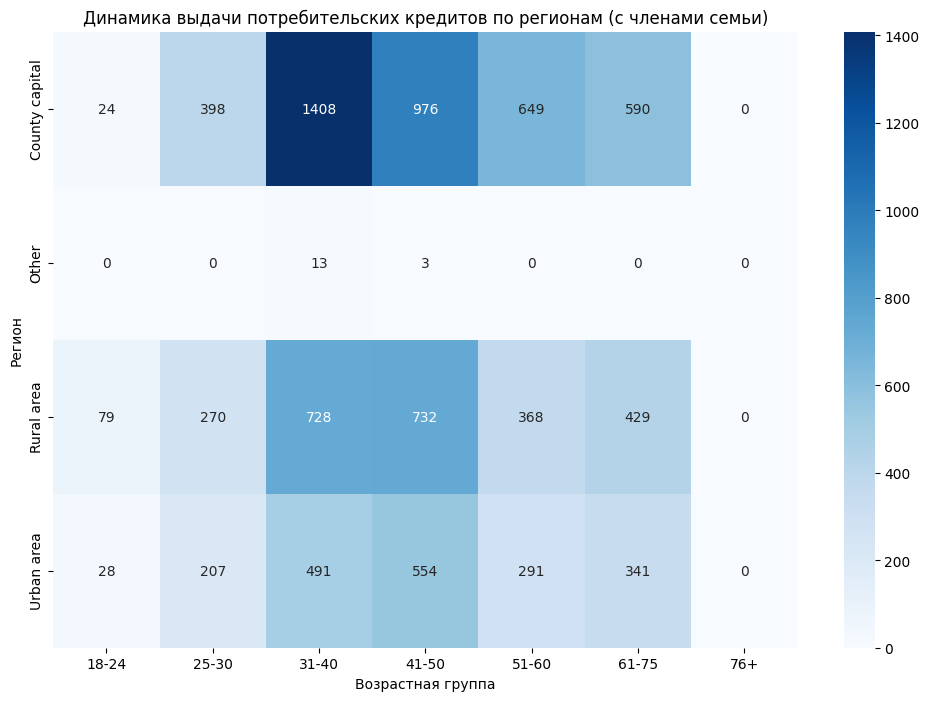

In [ ]:
# Сравнение динамики выдачи кредитов по регионам для людей с членами семьи
region_credit_analysis_with_family = with_family_df.groupby(['Region', 'Age_Group'])['Credit_Type'].count().unstack()

# Визуализация данных по динамике выдачи кредитов по регионам
plt.figure(figsize=(12, 8))
sns.heatmap(region_credit_analysis_with_family, annot=True, cmap="Blues", fmt="d")
plt.title('Динамика выдачи потребительских кредитов по регионам (с членами семьи)')
plt.xlabel('Возрастная группа')
plt.ylabel('Регион')
plt.show()


<ipython-input-23-bdba5784fc26>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  region_credit_analysis_with_family = with_family_df.groupby(['Region', 'Age_Group'])['Credit_Type'].count().unstack()


<Figure size 1200x800 with 0 Axes>

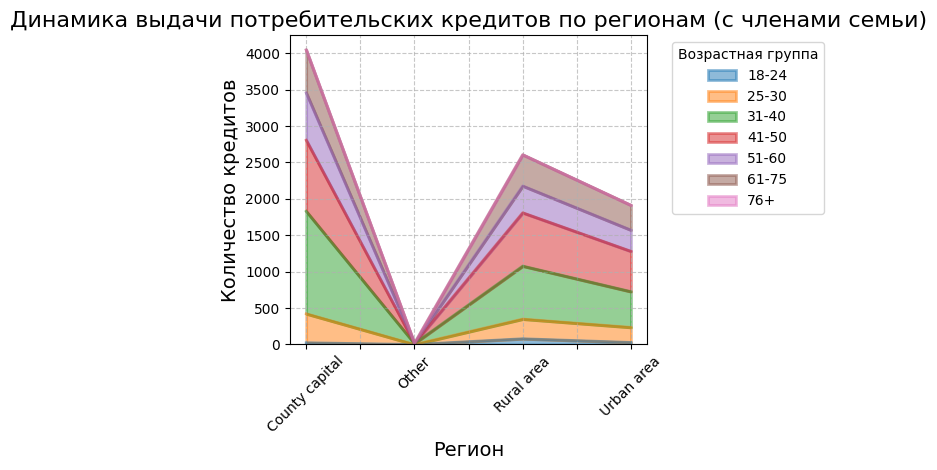

In [ ]:
region_credit_analysis_with_family = with_family_df.groupby(['Region', 'Age_Group'])['Credit_Type'].count().unstack()

# Визуализация с помощью графика с областями
plt.figure(figsize=(12, 8))
region_credit_analysis_with_family.plot(kind='area', alpha=0.5, linewidth=2)
plt.title('Динамика выдачи потребительских кредитов по регионам (с членами семьи)', fontsize=16)
plt.xlabel('Регион', fontsize=14)
plt.ylabel('Количество кредитов', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Возрастная группа', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(visible=True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<ipython-input-24-4da2a2cc263f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_credit_count.index, y=region_credit_count.values, palette='viridis')


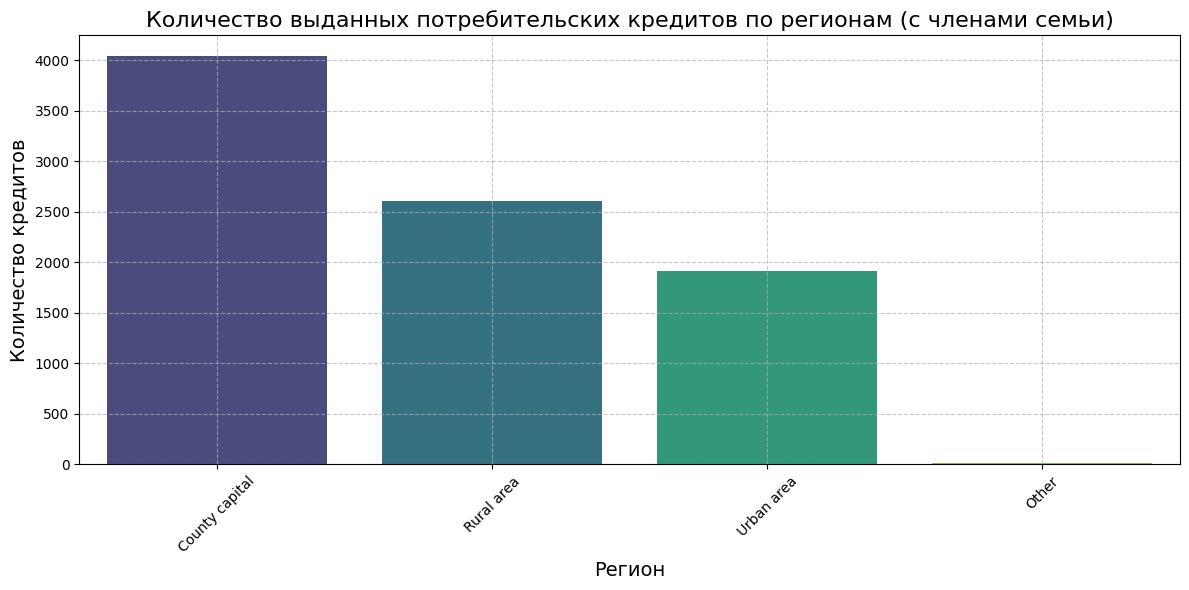

In [ ]:
# Сравнение количества выданных кредитов по регионам (без разделения на возрастные группы)
region_credit_count = with_family_df['Region'].value_counts()

# Визуализация данных с помощью столбчатой диаграммы
plt.figure(figsize=(12, 6))
sns.barplot(x=region_credit_count.index, y=region_credit_count.values, palette='viridis')
plt.title('Количество выданных потребительских кредитов по регионам (с членами семьи)', fontsize=16)
plt.xlabel('Регион', fontsize=14)
plt.ylabel('Количество кредитов', fontsize=14)
plt.xticks(rotation=45)
plt.grid(visible=True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<ipython-input-89-ae5e8c727fe9>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_credit_analysis_with_family = with_family_df.groupby('Age_Group')['Credit_Type'].count()
<ipython-input-89-ae5e8c727fe9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_credit_analysis_with_family.index, y=age_credit_analysis_with_family.values, palette='viridis')


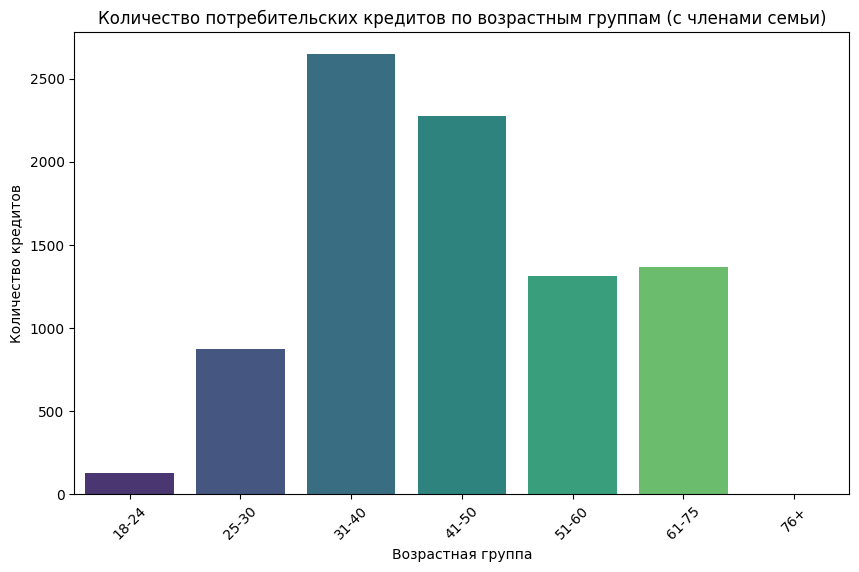

In [ ]:
# Сравнение количества кредитов по возрастным группам
age_credit_analysis_with_family = with_family_df.groupby('Age_Group')['Credit_Type'].count()

# Визуализация данных по количеству кредитов по возрастным группам
plt.figure(figsize=(10, 6))
sns.barplot(x=age_credit_analysis_with_family.index, y=age_credit_analysis_with_family.values, palette='viridis')
plt.title('Количество потребительских кредитов по возрастным группам (с членами семьи)')
plt.xlabel('Возрастная группа')
plt.ylabel('Количество кредитов')
plt.xticks(rotation=45)
plt.show()


<ipython-input-25-1fa1644b983a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_credit_count_single.index, y=region_credit_count_single.values, palette='magma')


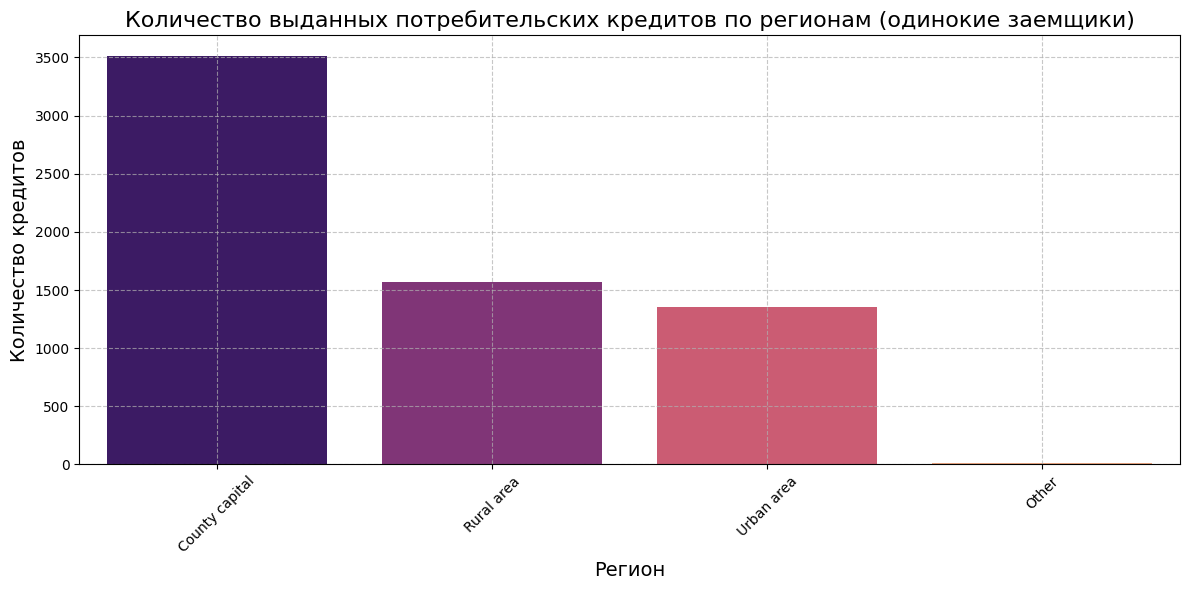

In [ ]:
# Сравнение количества выданных кредитов по регионам (для одиноких заемщиков)
region_credit_count_single = single_df['Region'].value_counts()

# Визуализация данных с помощью столбчатой диаграммы
plt.figure(figsize=(12, 6))
sns.barplot(x=region_credit_count_single.index, y=region_credit_count_single.values, palette='magma')
plt.title('Количество выданных потребительских кредитов по регионам (одинокие заемщики)', fontsize=16)
plt.xlabel('Регион', fontsize=14)
plt.ylabel('Количество кредитов', fontsize=14)
plt.xticks(rotation=45)
plt.grid(visible=True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<ipython-input-29-03a3a611e66b>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  region_credit_analysis_single = single_df.groupby(['Region', 'Age_Group'])['Credit_Type'].count().unstack()


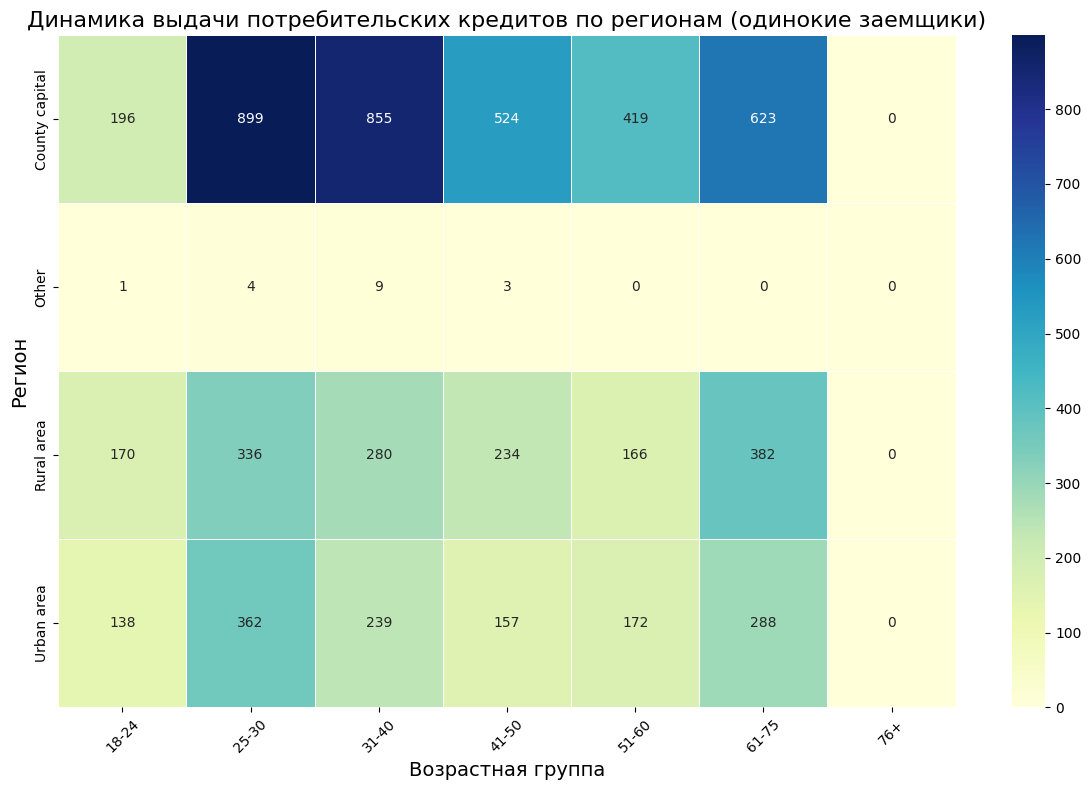

<ipython-input-29-03a3a611e66b>:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  region_credit_analysis_single = single_df.groupby(['Region', 'Age_Group'])['Credit_Type'].count().unstack()


<Figure size 1200x800 with 0 Axes>

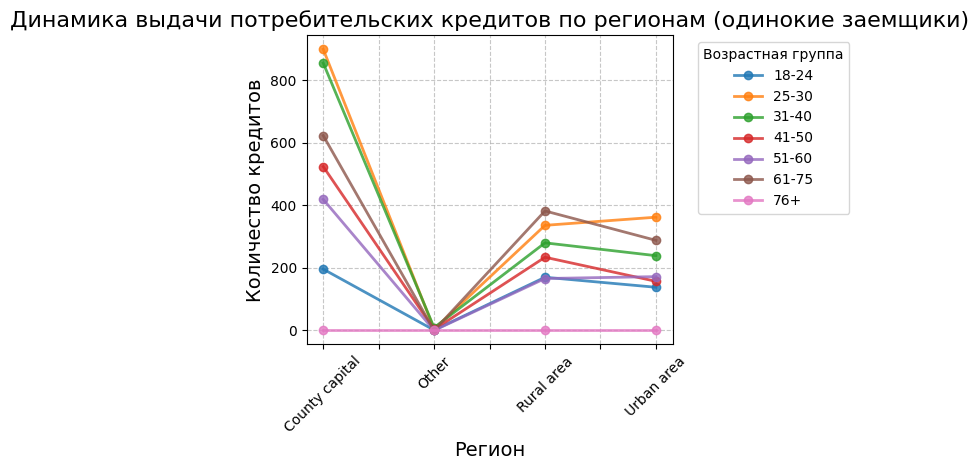

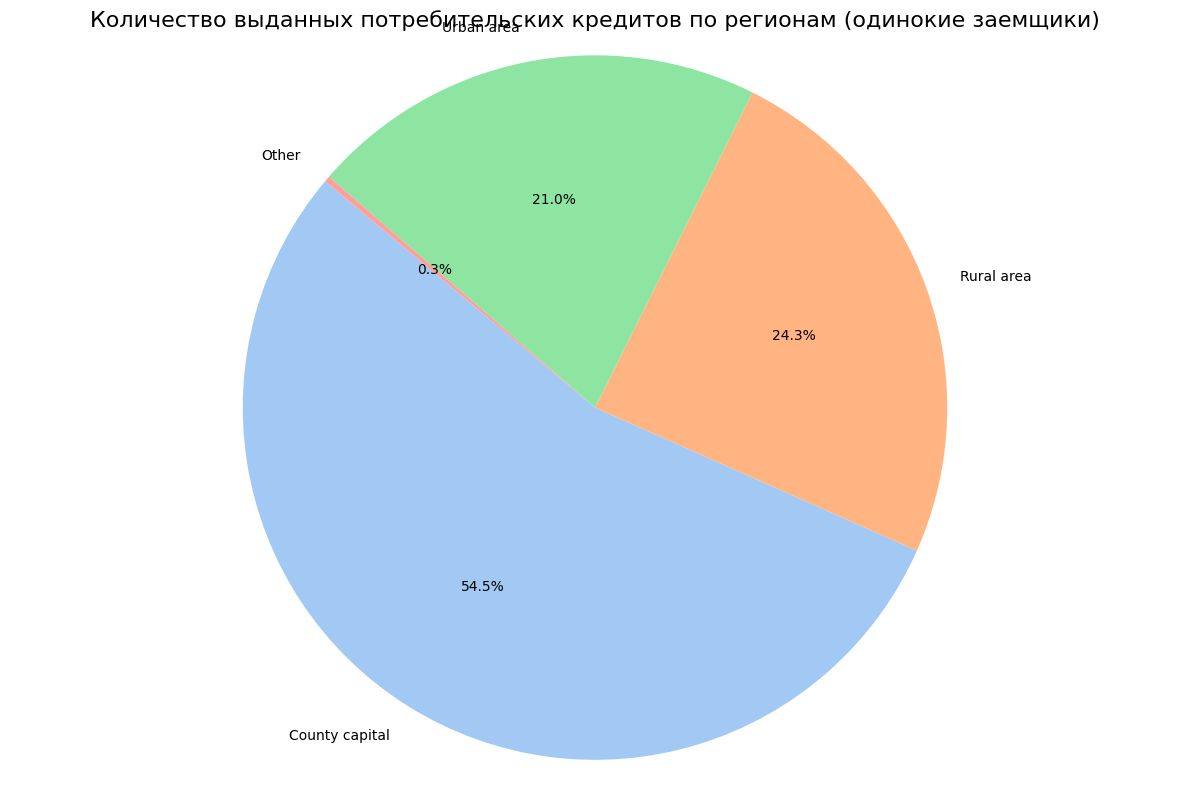

<ipython-input-29-03a3a611e66b>:41: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_credit_analysis_single = single_df.groupby('Age_Group')['Credit_Type'].count()
<ipython-input-29-03a3a611e66b>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_credit_analysis_single.index, y=age_credit_analysis_single.values, palette='plasma')


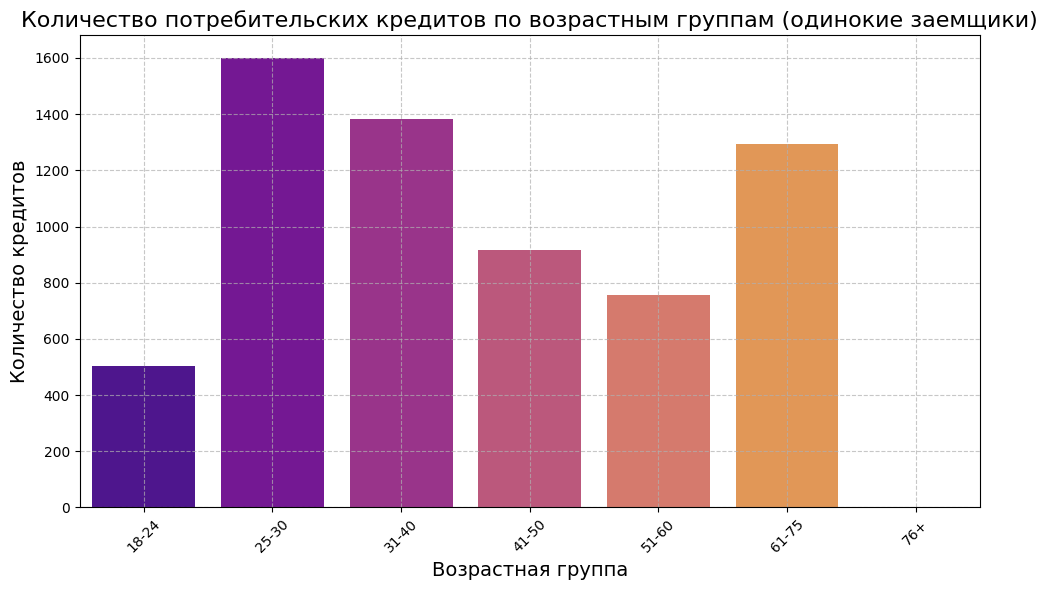

In [ ]:
# Сравнение динамики выдачи кредитов по регионам для одиноких заемщиков
region_credit_analysis_single = single_df.groupby(['Region', 'Age_Group'])['Credit_Type'].count().unstack()

# Визуализация данных по динамике выдачи кредитов по регионам
plt.figure(figsize=(12, 8))
sns.heatmap(region_credit_analysis_single, annot=True, cmap="YlGnBu", fmt="d", linewidths=0.5)
plt.title('Динамика выдачи потребительских кредитов по регионам (одинокие заемщики)', fontsize=16)
plt.xlabel('Возрастная группа', fontsize=14)
plt.ylabel('Регион', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Подготовка данных для графика
region_credit_analysis_single = single_df.groupby(['Region', 'Age_Group'])['Credit_Type'].count().unstack()

# Визуализация с помощью графика с областями
plt.figure(figsize=(12, 8))
region_credit_analysis_single.plot(kind='line', marker='o', linewidth=2, alpha=0.8)
plt.title('Динамика выдачи потребительских кредитов по регионам (одинокие заемщики)', fontsize=16)
plt.xlabel('Регион', fontsize=14)
plt.ylabel('Количество кредитов', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Возрастная группа', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(visible=True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Сравнение количества выданных кредитов по регионам (без разделения на возрастные группы)
region_credit_count_single = single_df['Region'].value_counts()

# Визуализация данных с помощью круговой диаграммы
plt.figure(figsize=(12, 8))
plt.pie(region_credit_count_single, labels=region_credit_count_single.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Количество выданных потребительских кредитов по регионам (одинокие заемщики)', fontsize=16)
plt.axis('equal')  # Чтобы круговая диаграмма была круглой
plt.tight_layout()
plt.show()

# Сравнение количества кредитов по возрастным группам
age_credit_analysis_single = single_df.groupby('Age_Group')['Credit_Type'].count()

# Визуализация данных по количеству кредитов по возрастным группам
plt.figure(figsize=(10, 6))
sns.barplot(x=age_credit_analysis_single.index, y=age_credit_analysis_single.values, palette='plasma')
plt.title('Количество потребительских кредитов по возрастным группам (одинокие заемщики)', fontsize=16)
plt.xlabel('Возрастная группа', fontsize=14)
plt.ylabel('Количество кредитов', fontsize=14)
plt.xticks(rotation=45)
plt.grid(visible=True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
# Создание таблицы для одиноких
single_df = df_calc[(df_calc['HOUSEHOLD_MEMBERS'] == 1) & (df_calc['NO_OF_DEPENDENTS'] == 0)]

# Сравнение динамики выдачи кредитов по регионам для одиноких
region_credit_analysis_single = single_df.groupby(['Region', 'Age_Group'])['Credit_Type'].count().unstack()

# Визуализация динамики выдачи кредитов по регионам
plt.figure(figsize=(12, 8))
sns.heatmap(region_credit_analysis_single, annot=True, cmap="Blues", fmt="d")
plt.title('Динамика выдачи потребительских кредитов по регионам (одинокие)')
plt.xlabel('Возрастная группа')
plt.ylabel('Регион')
plt.show()

# Сравнение количества выданных кредитов по регионам (без разделения на возрастные группы)
region_credit_count_single = single_df['Region'].value_counts()

# Визуализация данных с помощью столбчатой диаграммы
plt.figure(figsize=(12, 6))
sns.barplot(x=region_credit_count_single.index, y=region_credit_count_single.values, palette='viridis')
plt.title('Количество выданных потребительских кредитов по регионам (одинокие)', fontsize=16)
plt.xlabel('Регион', fontsize=14)
plt.ylabel('Количество кредитов', fontsize=14)
plt.xticks(rotation=45)
plt.grid(visible=True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Сравнение количества кредитов по возрастным группам
age_credit_analysis_single = single_df.groupby('Age_Group')['Credit_Type'].count()

# Визуализация данных по количеству кредитов по возрастным группам
plt.figure(figsize=(10, 6))
sns.barplot(x=age_credit_analysis_single.index, y=age_credit_analysis_single.values, palette='viridis')
plt.title('Количество потребительских кредитов по возрастным группам (одинокие)', fontsize=16)
plt.xlabel('Возрастная группа', fontsize=14)
plt.ylabel('Количество кредитов', fontsize=14)
plt.xticks(rotation=45)
plt.grid(visible=True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Влияние возраста на выдачу кредитов
age_credit_summary = single_df.groupby('Age_Group')['Credit_Type'].count().reset_index()
age_credit_summary.columns = ['Age_Group', 'Credit_Count']

# Вывод результатов
print(age_credit_summary)


In [ ]:
# Создание новой таблицы для сравнения
comparison_df = pd.DataFrame({
    'Age_Group': pd.concat([single_df['Age_Group'], with_family_df['Age_Group']], ignore_index=True),
    'Region': pd.concat([single_df['Region'], with_family_df['Region']], ignore_index=True),
    'Group': ['One Person'] * len(single_df) + ['With Family'] * len(with_family_df)
})

comparison_df.head()

,Age_Group,Region,Group
0,31-40,County capital,One Person
1,31-40,County capital,One Person
2,31-40,Rural area,One Person
3,25-30,Rural area,One Person
4,25-30,County capital,One Person


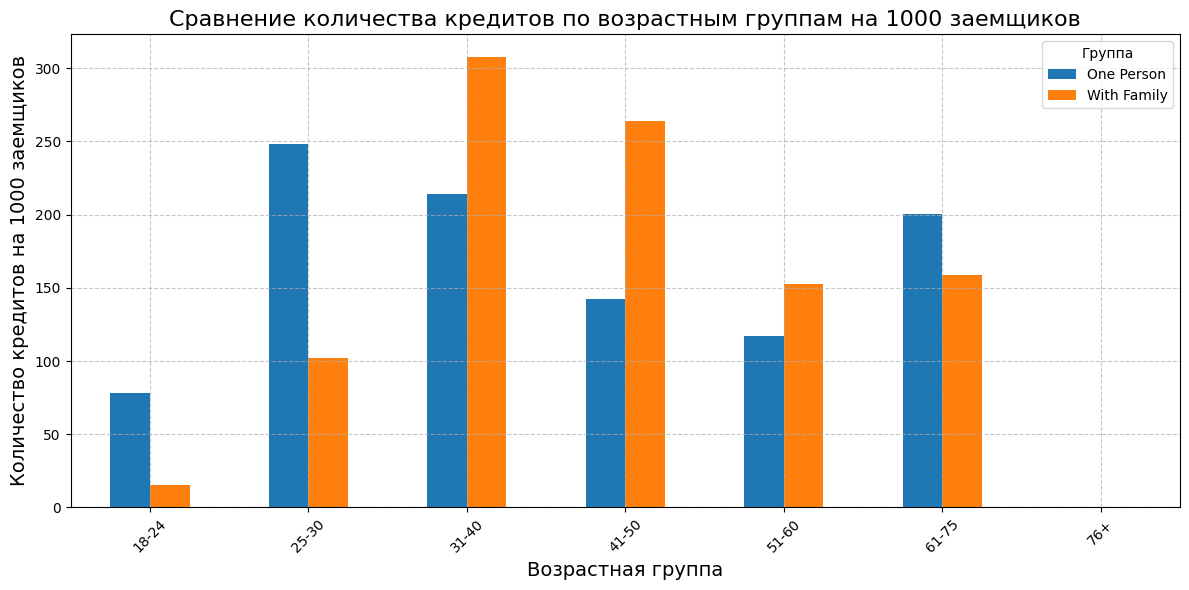

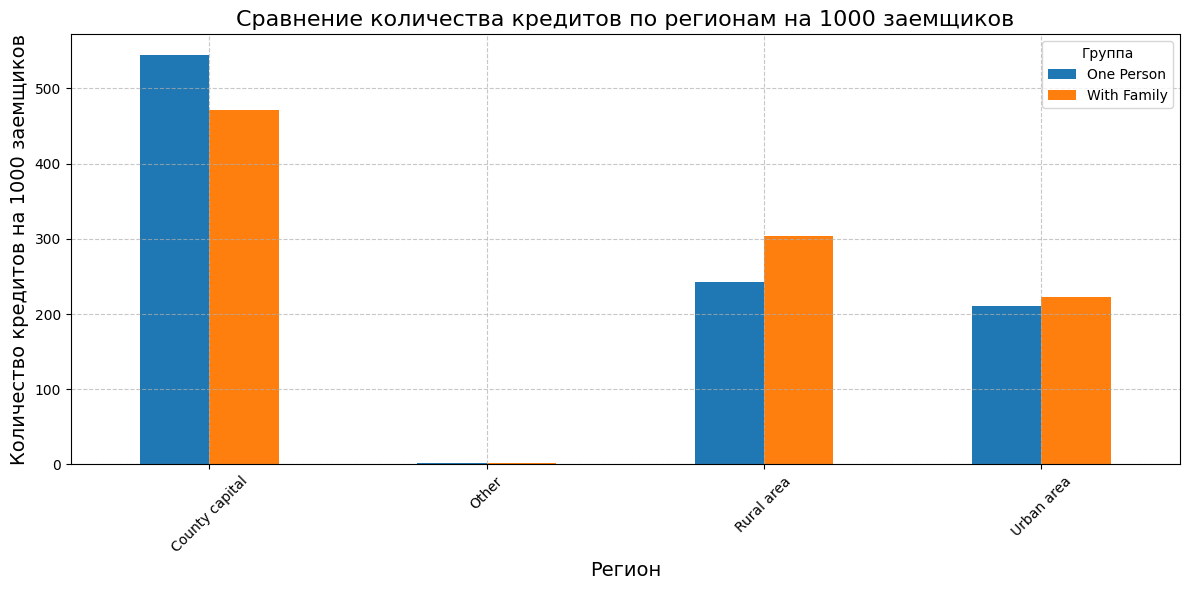

In [ ]:
# Общее количество заемщиков в каждой группе
total_borrowers = comparison_df['Group'].value_counts()

# Нормализация на 1000 заемщиков
age_group_comparison = age_group_comparison.div(total_borrowers, axis=1) * 1000

# Визуализация сравнения по возрастным группам
age_group_comparison.plot(kind='bar', figsize=(12, 6))
plt.title('Сравнение количества кредитов по возрастным группам на 1000 заемщиков', fontsize=16)
plt.xlabel('Возрастная группа', fontsize=14)
plt.ylabel('Количество кредитов на 1000 заемщиков', fontsize=14)
plt.xticks(rotation=45)
plt.grid(visible=True, linestyle='--', alpha=0.7)
plt.legend(title='Группа')
plt.tight_layout()
plt.show()

# Сравнение по регионам
region_comparison = comparison_df.groupby(['Region', 'Group']).size().unstack(fill_value=0)

# сколько прихоидтся на 1000 заемщиков
region_comparison = region_comparison.div(total_borrowers, axis=1) * 1000

# Визуализация сравнения по регионам
region_comparison.plot(kind='bar', figsize=(12, 6))
plt.title('Сравнение количества кредитов по регионам на 1000 заемщиков', fontsize=16)
plt.xlabel('Регион', fontsize=14)
plt.ylabel('Количество кредитов на 1000 заемщиков', fontsize=14)
plt.xticks(rotation=45)
plt.grid(visible=True, linestyle='--', alpha=0.7)
plt.legend(title='Группа')
plt.tight_layout()
plt.show()

После работы с данными создаём нужные нам таблицы с нужными колонками, 1 общая
2 люди с членами семьи
3 люди без членов семьи, одинокие в том числе разведенные

In [ ]:
All_cacl = df_calc[['Age', 'Age_Group', 'Region', 'HOUSEHOLD_MEMBERS', 'NO_OF_DEPENDENTS', 'Income']]
All_cacl.head()

,Age,Age_Group,Region,HOUSEHOLD_MEMBERS,NO_OF_DEPENDENTS,Income
0,65,61-75,County capital,2,0,1245.0
1,64,61-75,County capital,2,0,1380.0
2,30,25-30,Urban area,2,0,1131.0
3,39,31-40,County capital,1,0,1730.0
4,38,31-40,County capital,1,0,1189.0


In [ ]:
# Создание таблицы для людей с членами семьи и оформленным кредитом
with_family_df1 = All_cacl[(df['HOUSEHOLD_MEMBERS'] > 1) | (df['NO_OF_DEPENDENTS'] > 0)]
with_family_df1 = with_family_df[['Age', 'Age_Group', 'Region']]
with_family_df1.head()

,Age,Age_Group,Region
0,65,61-75,County capital
1,64,61-75,County capital
2,30,25-30,Urban area
6,45,41-50,County capital
8,45,41-50,Rural area


In [ ]:
# Создание таблицы для одиноких людей с оформленным кредитом
single_df1 = df_calc[(df['HOUSEHOLD_MEMBERS'] == 1) & (df['NO_OF_DEPENDENTS'] == 0)]
single_df1 = single_df[['Age', 'Age_Group', 'Region']]
single_df1.head()

,Age,Age_Group,Region
3,39,31-40,County capital
4,38,31-40,County capital
5,40,31-40,Rural area
7,27,25-30,Rural area
10,28,25-30,County capital


In [ ]:
# Сохранение таблиц в CSV
All_cacl.to_csv('df_calc.csv', index=False)
with_family_df1.to_csv('with_family_df.csv', index=False)
single_df1.to_csv('single_df.csv', index=False)

# Скачивание файлов
from google.colab import files
files.download('df_calc.csv')
files.download('with_family_df.csv')
files.download('single_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>